In [44]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import json
from pprint import pprint

# Census & gmaps API Keys
from config import api_key
c = Census(api_key, year=2016)



In [45]:
#To read pop_grad data
pop_grad_data_to_load = "pop_grad_data.csv"
pop_grad_data = pd.read_csv(pop_grad_data_to_load)
pop_grad_data=pop_grad_data.rename(columns={"DISTRICT_NAME_left":"City",
                                            "GRAD_RATE":"Graduation_rate"})
pop_grad_data

,dist_year,City,SCHOOL_NAME,YEAR,Graduation_rate,DISTRICT_NAME_right,STNAME,Year,Population
0,BRIDGETON2016,BRIDGETON,Bridgeton High School,2016,78.78,BRIDGETON,New Jersey,2016,24817.0
1,CLIFTON2016,CLIFTON,Clifton High School,2016,83.79,CLIFTON,New Jersey,2016,86414.0
2,HOBOKEN2016,HOBOKEN,Hoboken High School,2016,86.01,HOBOKEN,New Jersey,2016,55044.0
3,PRINCETON2016,PRINCETON,Princeton High School,2016,94.85,PRINCETON,New Jersey,2016,31415.0
4,SUMMIT2016,SUMMIT,Summit High School,2016,96.09,SUMMIT,New Jersey,2016,22238.0


In [46]:
#Join Demographic and GradRate
demo_grad_data = pop_grad_data.set_index(["City"])
demo_grad_data = demo_grad_data.sort_values(by="City", ascending=False)
demo_grad_data

,dist_year,SCHOOL_NAME,YEAR,Graduation_rate,DISTRICT_NAME_right,STNAME,Year,Population
City,,,,,,,,
SUMMIT,SUMMIT2016,Summit High School,2016,96.09,SUMMIT,New Jersey,2016,22238.0
PRINCETON,PRINCETON2016,Princeton High School,2016,94.85,PRINCETON,New Jersey,2016,31415.0
HOBOKEN,HOBOKEN2016,Hoboken High School,2016,86.01,HOBOKEN,New Jersey,2016,55044.0
CLIFTON,CLIFTON2016,Clifton High School,2016,83.79,CLIFTON,New Jersey,2016,86414.0
BRIDGETON,BRIDGETON2016,Bridgeton High School,2016,78.78,BRIDGETON,New Jersey,2016,24817.0


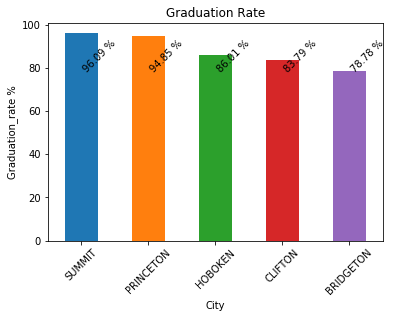

In [47]:
#Plot Grad Rate vs Demographic(White %)
ax = demo_grad_data.plot.bar(y="Graduation_rate",legend=False)
for i, label in enumerate(list(demo_grad_data.index)):
    ax.annotate("{} %".format(demo_grad_data["Graduation_rate"][i]),(i, 90),ha="left",rotation=45)
plt.ylabel("Graduation_rate %")
plt.title("Graduation Rate")
plt.xticks(rotation=45)
plt.savefig("../graph/GradRate_WithError_usingAPI")